In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
com = pd.read_csv('Computer_data.csv')

In [3]:
com.shape

(6259, 11)

In [4]:
com.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [5]:
com.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


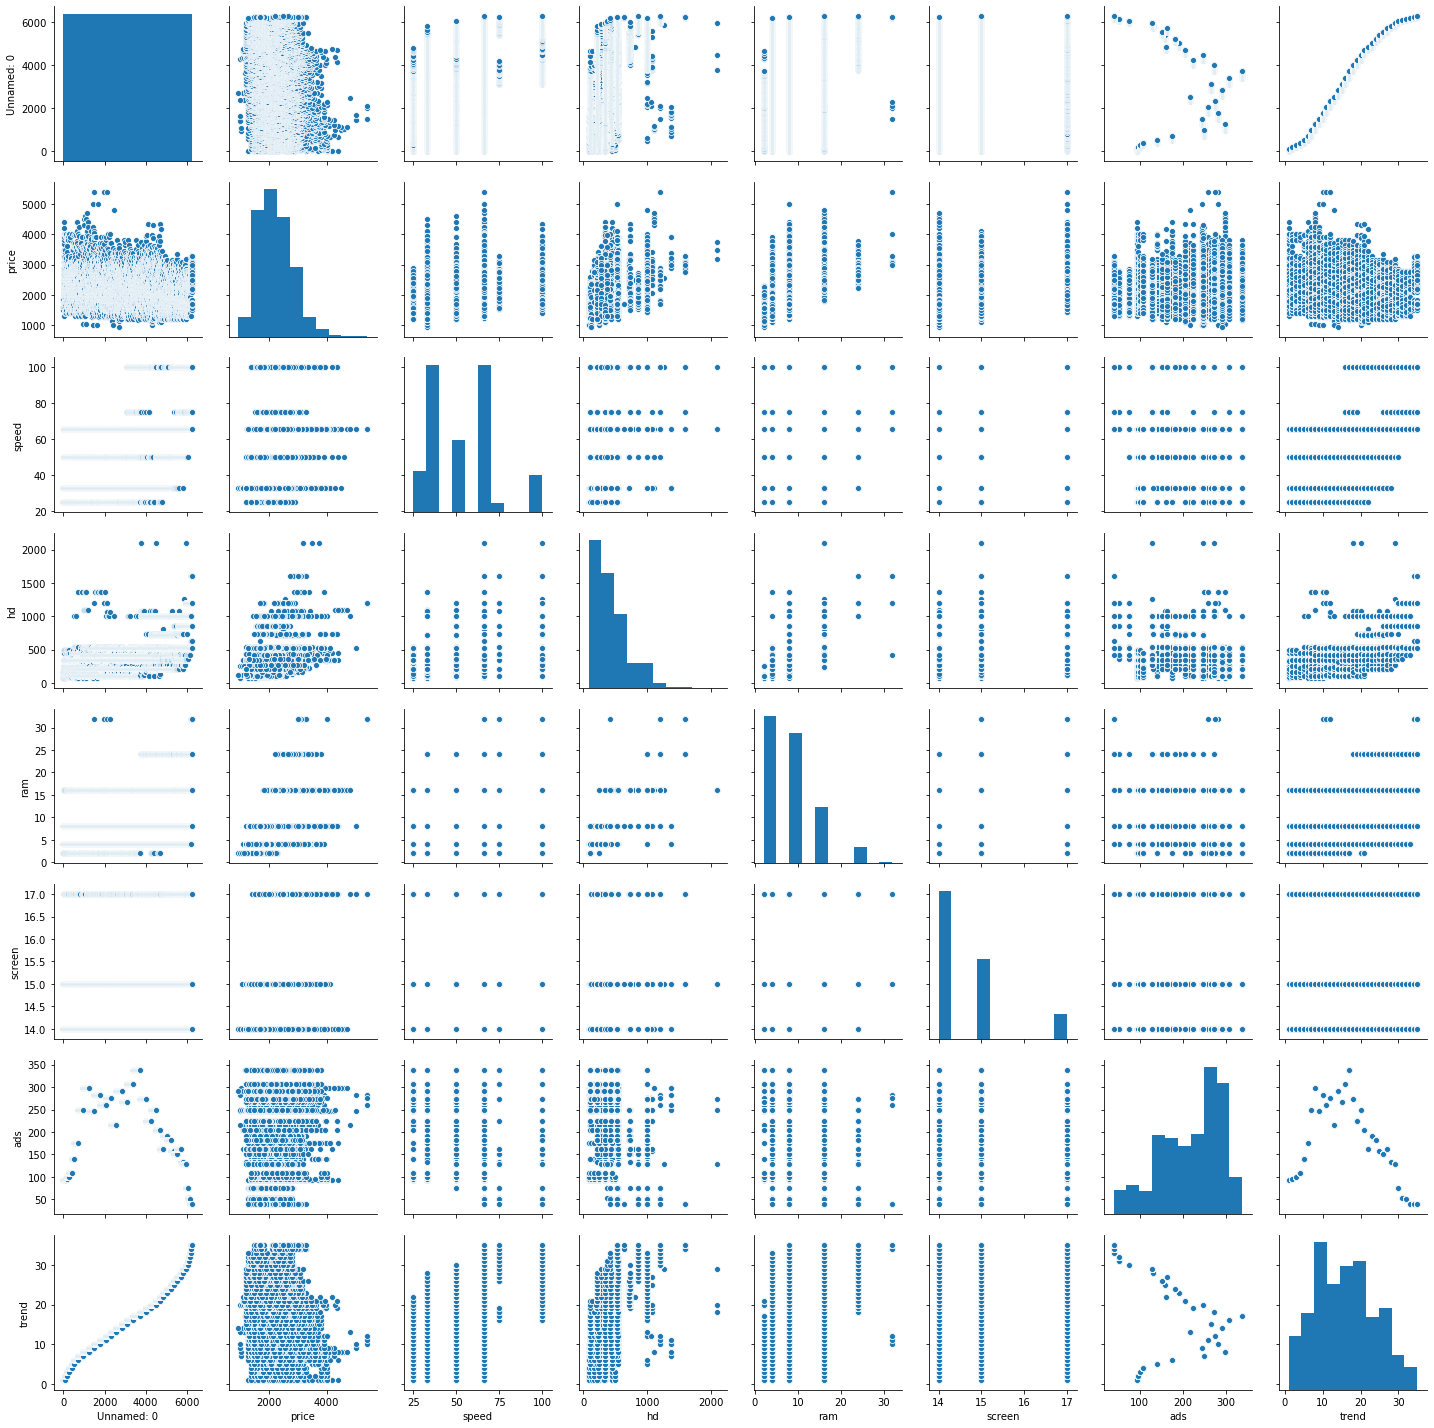

In [6]:
sns.pairplot(com)

In [7]:
com.isnull().any()

Unnamed: 0    False
price         False
speed         False
hd            False
ram           False
screen        False
cd            False
multi         False
premium       False
ads           False
trend         False
dtype: bool

In [8]:
com.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [9]:
com['multi'] = com['multi'].map({'yes': 1, 'no': 0})
print(com)
com['cd'] = com['cd'].map({'yes': 1, 'no': 0})
print(com)
com['premium'] = com['premium'].map({'yes': 1, 'no': 0})
print(com)

      Unnamed: 0  price  speed    hd  ram  screen   cd  multi premium  ads  \
0              1   1499     25    80    4      14   no      0     yes   94   
1              2   1795     33    85    2      14   no      0     yes   94   
2              3   1595     25   170    4      15   no      0     yes   94   
3              4   1849     25   170    8      14   no      0      no   94   
4              5   3295     33   340   16      14   no      0     yes   94   
...          ...    ...    ...   ...  ...     ...  ...    ...     ...  ...   
6254        6255   1690    100   528    8      15   no      0     yes   39   
6255        6256   2223     66   850   16      15  yes      1     yes   39   
6256        6257   2654    100  1200   24      15  yes      0     yes   39   
6257        6258   2195    100   850   16      15  yes      0     yes   39   
6258        6259   2490    100   850   16      17  yes      0     yes   39   

      trend  
0         1  
1         1  
2         1  
3      

In [10]:
X = com[['Unnamed: 0', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend']].values.reshape(-1,10)
print(X)

[[   1   25   80 ...,    1   94    1]
 [   2   33   85 ...,    1   94    1]
 [   3   25  170 ...,    1   94    1]
 ..., 
 [6257  100 1200 ...,    1   39   35]
 [6258  100  850 ...,    1   39   35]
 [6259  100  850 ...,    1   39   35]]


In [11]:
Y= com['price'].values.reshape(-1,1)
print(Y)

[[1499]
 [1795]
 [1595]
 ..., 
 [2654]
 [2195]
 [2490]]


In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(X_train,Y_train)

In [14]:
print(lm.intercept_)

[ 371.55472998]


In [15]:
print(lm.coef_)

[[  1.03064290e-01   9.45101253e+00   8.21579109e-01   4.77361825e+01
    1.22963526e+02   4.80818856e+01   1.05381875e+02  -5.09697926e+02
    5.91349952e-01  -7.58360342e+01]]


In [16]:
model.score(X_train,Y_train)  #R^2 value 

0.77970885102986287

In [17]:
predictions = model.predict(X_test)

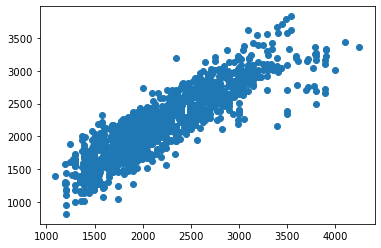

In [18]:
plt.scatter(Y_test,predictions)

In [19]:
from sklearn import metrics


In [20]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))

MAE 210.451218831


In [21]:
print('MSE',metrics.mean_squared_error(Y_test,predictions))

MSE 75086.8265331


In [22]:
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE 274.019755735


In [23]:
import pylab

[[ 0.84147098 -0.13235175 -0.99388865 ...,  0.84147098 -0.24525199
   0.84147098]
 [ 0.90929743  0.99991186 -0.17607562 ...,  0.84147098 -0.24525199
   0.84147098]
 [ 0.14112001 -0.13235175  0.34664946 ...,  0.84147098 -0.24525199
   0.84147098]
 ..., 
 [-0.86869711 -0.50636564 -0.08827861 ...,  0.84147098  0.96379539
  -0.42818267]
 [-0.05254175 -0.50636564  0.98022773 ...,  0.84147098  0.96379539
  -0.42818267]
 [ 0.81192026 -0.50636564  0.98022773 ...,  0.84147098  0.96379539
  -0.42818267]]


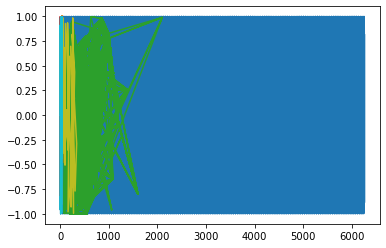

In [24]:
Y1 = np.sin(X)
pylab.plot(X,Y1)
print(Y1)


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[[ 0.          3.21887582  4.38202663 ...,  0.          4.54329478  0.        ]
 [ 0.69314718  3.49650756  4.44265126 ...,  0.          4.54329478  0.        ]
 [ 1.09861229  3.21887582  5.13579844 ...,  0.          4.54329478  0.        ]
 ..., 
 [ 8.74145612  4.60517019  7.09007684 ...,  0.          3.66356165
   3.55534806]
 [ 8.74161592  4.60517019  6.74523635 ...,  0.          3.66356165
   3.55534806]
 [ 8.74177571  4.60517019  6.74523635 ...,  0.          3.66356165
   3.55534806]]


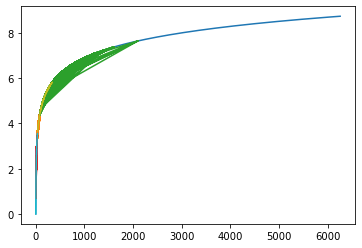

In [25]:
Y3 = np.log(X)
pylab.plot(X,Y3)
print(Y3)

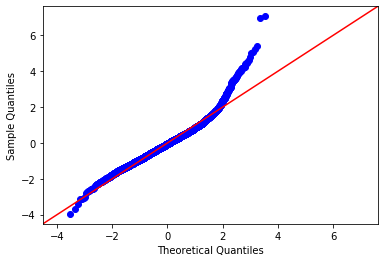

In [26]:
import statsmodels.api as sm
#4.Normal distribution of error terms:
model = sm.OLS(Y_train,X_train).fit()
res = model.resid #residuals
fig = sm.qqplot(res,fit=True,line='45')
plt.show()  #Q-Qplot for the advertising data set

In [27]:
mod= sm.OLS(Y_train,X_train) #5.Little or No autocorrelation in the residuals:
results = mod.fit()
print(results.summary())  #Summary of the fitted Linear Model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          3.441e+04
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                        0.00
Time:                        16:47:52   Log-Likelihood:                         -35219.
No. Observations:                5007   AIC:                                  7.046e+04
Df Residuals:                    4997   BIC:                                  7.052e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------